#Modélisation
1-Feature selection
2-Finetuning/Cross Validation

### Chargement des données

In [1]:
import pandas as pd
from src.data_eng.prepare_db import *

full_dataset = load_dataset("bank-additional-full.csv")
print("Le dataset contient", len(full_dataset), "lignes")

Le dataset contient 41188 lignes


### Définition des types de variables
- Features en entrée par type

In [2]:
features = full_dataset.columns[:-1]
continuous_features = [col for col in features if full_dataset[col].dtype != 'object']
print("Variables continues:", continuous_features)
categorical_features = [col for col in features if full_dataset[col].dtype == 'object']
print("Variables categoriques:", categorical_features)
# On vérifie qu'on oublie rien (des dates ou autres)
print("Toutes les variables sont prises en compte:",
      (set(categorical_features).union(continuous_features)).difference(set(features)))

Variables continues: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Variables categoriques: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Toutes les variables sont prises en compte: set()


- Réencodage de la cible

In [3]:
target_column = "y"
full_dataset[target_column] = full_dataset[target_column].map({"yes": 1, "no": 0})


### On encode les variables catégoriques avec du one-hot encoding

In [4]:
from src.modelling.cross_validation import *
full_dataset_encoded = pd.get_dummies(full_dataset, columns = categorical_features, drop_first=True)

### On divise le dataset en train/test

In [5]:
train, test = split_dataset(full_dataset_encoded, 0.6)# fonction custom mais on peut utiliser sklearn
train_targets = train[target_column]
test_targets = test[target_column]
train = train.drop(columns=["y"])
test = test.drop(columns = ["y"])

### Selection de feature.
- Modèle de base pour avoir l'importance des features
- Sélection itérative en retirant les features les moins importantes
- Evaluation sur la base de test

In [6]:
from xgboost import XGBClassifier
from src.modelling.cross_validation import feature_selection
results_selection = feature_selection(XGBClassifier, train, train_targets, test,test_targets, metric=f1_score)

/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=53, Accuracy: 59.44%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=53, Accuracy: 59.44%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=53, Accuracy: 59.44%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=53, Accuracy: 59.44%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=53, Accuracy: 59.44%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.004, n=48, Accuracy: 59.44%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.004, n=47, Accuracy: 59.54%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.006, n=46, Accuracy: 59.85%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.006, n=45, Accuracy: 60.21%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.006, n=44, Accuracy: 59.20%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.007, n=43, Accuracy: 59.19%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.007, n=42, Accuracy: 58.96%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.007, n=41, Accuracy: 58.57%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.007, n=40, Accuracy: 58.69%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.007, n=39, Accuracy: 59.05%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.007, n=38, Accuracy: 58.98%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.007, n=37, Accuracy: 59.26%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.008, n=36, Accuracy: 59.79%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.008, n=35, Accuracy: 59.44%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.008, n=34, Accuracy: 59.52%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.008, n=33, Accuracy: 59.43%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.008, n=32, Accuracy: 59.81%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.008, n=31, Accuracy: 59.95%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.008, n=30, Accuracy: 59.36%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.008, n=29, Accuracy: 59.21%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.008, n=28, Accuracy: 59.08%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.009, n=27, Accuracy: 58.21%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.009, n=26, Accuracy: 58.78%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.009, n=25, Accuracy: 59.10%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.009, n=24, Accuracy: 58.70%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.009, n=23, Accuracy: 59.56%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.009, n=22, Accuracy: 60.43%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.009, n=21, Accuracy: 60.02%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.009, n=20, Accuracy: 59.73%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.009, n=19, Accuracy: 59.01%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.009, n=18, Accuracy: 59.39%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.010, n=17, Accuracy: 59.62%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.010, n=16, Accuracy: 58.83%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.010, n=15, Accuracy: 58.69%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.011, n=14, Accuracy: 59.08%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.011, n=13, Accuracy: 59.79%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.011, n=12, Accuracy: 58.80%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.013, n=11, Accuracy: 58.23%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.013, n=10, Accuracy: 57.61%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.015, n=9, Accuracy: 58.04%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.022, n=8, Accuracy: 56.63%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.024, n=7, Accuracy: 56.50%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.026, n=6, Accuracy: 57.26%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.027, n=5, Accuracy: 56.18%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.030, n=4, Accuracy: 56.56%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.039, n=3, Accuracy: 54.87%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.043, n=2, Accuracy: 27.01%
Thresh=0.447, n=1, Accuracy: 26.49%


/Users/philippe.stepniewski/projets/Dojo_Banking/venv/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


- Affichage des performances en test en fonction du nombre de features en entrée

40    duration,pdays,emp.var.rate,cons.price.idx,con...
Name: selected_features, dtype: object


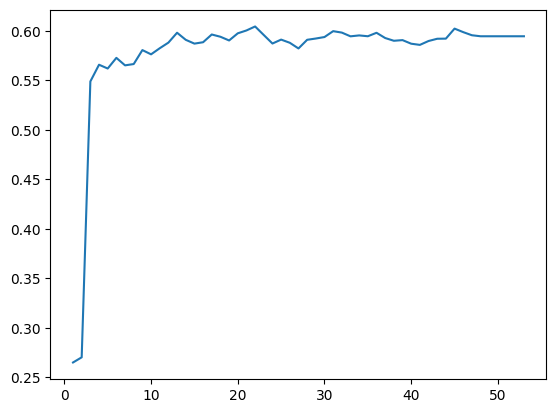

In [7]:
results_selection = pd.DataFrame(results_selection)
plt.plot(results_selection["number of features"],results_selection["metric"])
print(results_selection[results_selection["number of features"] == 13].selected_features)